In [1]:
import numpy as np
import keras
from keras.models import Sequential
from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPooling2D
from keras import backend as K
from keras.preprocessing import image
from keras.applications.mobilenet import MobileNet
from keras.applications.vgg16 import preprocess_input, decode_predictions
from keras.models import Model
from keras.preprocessing.image import ImageDataGenerator
import timeit
import cv2 as cv
import os
import PIL
import warnings
from tqdm import tqdm

Using TensorFlow backend.


In [0]:
from keras.preprocessing.image import ImageDataGenerator

In [0]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)

In [0]:
test_datagen = ImageDataGenerator(rescale=1./255)

In [0]:
!ls

sample_data


In [7]:
!pip install -U -q PyDrive

import tensorflow as tf
import timeit

config = tf.ConfigProto()
config.gpu_options.allow_growth = True

from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

     |████████████████████████████████| 993kB 3.4MB/s 


In [0]:
file_list = drive.ListFile({'q': "'root' in parents and trashed=false"}).GetList()
for file1 in file_list:
  print('title: %s, id: %s' % (file1['title'], file1['id']))

In [0]:
!pip install PyDrive
from pydrive.auth import GoogleAuth
from pydrive.drive import GoogleDrive
from google.colab import auth
from oauth2client.client import GoogleCredentials

# Authenticate and create the PyDrive client.
# This only needs to be done once in a notebook.
auth.authenticate_user()
gauth = GoogleAuth()
gauth.credentials = GoogleCredentials.get_application_default()
drive = GoogleDrive(gauth)

In [0]:
fileId = drive.CreateFile({'id': '1_VqrXTltdjiYMx05bHAQfZP2a3fFI25P'}) #DRIVE_FILE_ID is file id example: 1iytA1n2z4go3uVCwE_vIKouTKyIDjEq
print (fileId['title'])  # folder_data.zip
fileId.GetContentFile('folder_data.zip')  # Save Drive file as a local file



In [0]:
!unzip folder_data.zip -d ./


In [0]:
!ls cell_images

test  train


In [14]:
training_set = train_datagen.flow_from_directory('cell_images/train',
                                                 target_size = inp_shape,
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 23146 images belonging to 2 classes.


In [15]:
test_set = test_datagen.flow_from_directory('cell_images/test/',
                                                 target_size= inp_shape,
                                                 batch_size=32,
                                                 class_mode='binary')


Found 4412 images belonging to 2 classes.


In [13]:
img_pred = cv.imread('cell_images/test/Uninfected/C46P7ThinF_IMG_20151130_205828_cell_99.png')
inp_shape = img_pred.shape[0:2]
print(inp_shape)

(118, 136)


In [16]:
model = Sequential()

model.add(Conv2D(32, (3,3), input_shape= img_pred.shape,padding = 'same' ,activation='relu'))
model.add(Conv2D(32, (3,3),padding = 'same' ,activation='relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Conv2D(64, (3, 3),padding = 'same' ,activation = 'relu'))
model.add(Conv2D(64, (3, 3),padding = 'same' ,activation = 'relu'))
model.add(MaxPooling2D(pool_size=(2, 2), strides = 2))
model.add(Dropout(0.25))
model.add(Flatten())

model.add(Dense(units = 128, activation = 'relu'))
model.add(Dropout(0.25))
#model.add(Flatten())

model.add(Dense(units = 64, activation = 'relu'))
#model.add(Dropout(0.25))

model.add(Dense(units = 16, activation = 'relu'))
#model.add(Dropout(0.25))

model.add(Dense(units = 1, activation = 'sigmoid'))
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_3 (Conv2D)            (None, 118, 136, 32)      896       
_________________________________________________________________
conv2d_4 (Conv2D)            (None, 118, 136, 32)      9248      
_________________________________________________________________
max_pooling2d_3 (MaxPooling2 (None, 59, 68, 32)        0         
_________________________________________________________________
conv2d_5 (Conv2D)            (None, 59, 68, 64)        18496     
_________________________________________________________________
conv2d_6 (Conv2D)            (None, 59, 68, 64)        36928     
_________________________________________________________________
max_pooling2d_4 (MaxPooling2 (None, 29, 34, 64)        0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 29, 34, 64)        0         
__________

In [0]:
model.compile(loss = 'binary_crossentropy', optimizer = 'Adam', metrics = ['accuracy'])

In [18]:
model.fit_generator(training_set,
                         steps_per_epoch = 2000,
                         epochs = 5,
                         validation_data= test_set,
                         validation_steps = 800)


Epoch 1/5
2000/2000 [==============================] - 303s 151ms/step - loss: 0.2380 - acc: 0.9109 - val_loss: 0.1961 - val_acc: 0.9304
Epoch 2/5
2000/2000 [==============================] - 296s 148ms/step - loss: 0.1384 - acc: 0.9580 - val_loss: 0.1715 - val_acc: 0.9429
Epoch 3/5
2000/2000 [==============================] - 294s 147ms/step - loss: 0.1306 - acc: 0.9591 - val_loss: 0.2116 - val_acc: 0.9292
Epoch 4/5
2000/2000 [==============================] - 295s 147ms/step - loss: 0.1219 - acc: 0.9615 - val_loss: 0.2228 - val_acc: 0.9315
Epoch 5/5
2000/2000 [==============================] - 295s 147ms/step - loss: 0.1184 - acc: 0.9611 - val_loss: 0.1684 - val_acc: 0.9441


In [22]:
model.fit_generator(training_set,
                         steps_per_epoch = 2000,
                         epochs = 2,
                         validation_data= test_set,
                         validation_steps = 800)

Epoch 1/2
2000/2000 [==============================] - 296s 148ms/step - loss: 0.1027 - acc: 0.9648 - val_loss: 0.1813 - val_acc: 0.9466
Epoch 2/2
2000/2000 [==============================] - 296s 148ms/step - loss: 0.1052 - acc: 0.9651 - val_loss: 0.1732 - val_acc: 0.9493


(118, 136, 3)


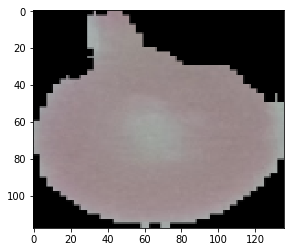

In [30]:
import matplotlib.pyplot as plt
img_pred = cv.imread('cell_images/test/Uninfected/C47P8thin_Original_Motic_IMG_20150714_093512_cell_100.png')
#img_pred = cv.imread('cell_images/test/Parasitized/C48P9thinF_IMG_20150721_160944_cell_224.png')
#im2 = plt.imshow(img_pred)
img_pred = cv.resize(img_pred, (136,118), interpolation = cv.INTER_AREA)
im = plt.imshow(img_pred)
img_pred = image.img_to_array(img_pred)
print(img_pred.shape)
img_pred = np.expand_dims(img_pred, axis=0)


#print(res[0][1])

In [31]:

res = model.predict(img_pred)
if res[0][0] == 0:
  print("Infected")
else:
  print("UnInfected")

UnInfected
